<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Исследование-задачи" data-toc-modified-id="Исследование-задачи-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследование задачи</a></span></li><li><span><a href="#Борьба-с-дисбалансом" data-toc-modified-id="Борьба-с-дисбалансом-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Борьба с дисбалансом</a></span><ul class="toc-item"><li><span><a href="#Модель-&quot;Решающее-дерево&quot;" data-toc-modified-id="Модель-&quot;Решающее-дерево&quot;-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Модель "Решающее дерево"</a></span></li><li><span><a href="#Модель-&quot;Случайный-Лес&quot;" data-toc-modified-id="Модель-&quot;Случайный-Лес&quot;-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Модель "Случайный Лес"</a></span></li><li><span><a href="#Модель-&quot;Логистическая-регрессия&quot;" data-toc-modified-id="Модель-&quot;Логистическая-регрессия&quot;-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Модель "Логистическая регрессия"</a></span></li><li><span><a href="#Взвешивание-классов" data-toc-modified-id="Взвешивание-классов-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Взвешивание классов</a></span></li><li><span><a href="#Модель-&quot;Решающее-Дерево&quot;" data-toc-modified-id="Модель-&quot;Решающее-Дерево&quot;-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Модель "Решающее Дерево"</a></span></li><li><span><a href="#Модель-&quot;Случайный-Лес&quot;" data-toc-modified-id="Модель-&quot;Случайный-Лес&quot;-3.6"><span class="toc-item-num">3.6&nbsp;&nbsp;</span>Модель "Случайный Лес"</a></span></li><li><span><a href="#ROC-кривые" data-toc-modified-id="ROC-кривые-3.7"><span class="toc-item-num">3.7&nbsp;&nbsp;</span>ROC-кривые</a></span></li></ul></li><li><span><a href="#Тестирование-модели" data-toc-modified-id="Тестирование-модели-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование модели</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Вывод</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Отток клиентов

Из «Бета-Банка» стали уходить клиенты. Каждый месяц. Немного, но заметно. Банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых.

Нужно спрогнозировать, уйдёт клиент из банка в ближайшее время или нет. Вам предоставлены исторические данные о поведении клиентов и расторжении договоров с банком. 

Постройте модель с предельно большим значением *F1*-меры. Чтобы сдать проект успешно, нужно довести метрику до 0.59. Проверьте *F1*-меру на тестовой выборке самостоятельно.

Дополнительно измеряйте *AUC-ROC*, сравнивайте её значение с *F1*-мерой.



# Описание данных
Данные находятся в файле /datasets/Churn.csv (англ. «отток клиентов»).

Признаки :
**RowNumber** — индекс строки в данных;
**CustomerId** — уникальный идентификатор клиента;
**Surname** — фамилия;
**CreditScore** — кредитный рейтинг;
**Geography** — страна проживания;
**Gender** — пол;
**Age** — возраст;
**Tenure**— сколько лет человек является клиентом банка;
**Balance** — баланс на счёте;
**NumOfProducts** — количество продуктов банка, используемых клиентом;
**HasCrCard** — наличие кредитной карты;
**IsActiveMember** — активность клиента;
**EstimatedSalary** — предполагаемая зарплата;

Целевой признак :
**Exited** — факт ухода клиента

## Подготовка данных

Импортируем необходимые нам библиотеки

In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_squared_error
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score,recall_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve
from sklearn.metrics import make_scorer
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


Прочитаем датафрем и выведем первые 20 строчек

In [2]:
data = pd.read_csv('/datasets/Churn.csv')
data.head(20)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8.0,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7.0,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4.0,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4.0,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2.0,134603.88,1,1,1,71725.73,0


Удалим ненужные столбцы "rownumber","customerid","surname"

In [3]:
data = data.drop(['RowNumber','CustomerId','Surname'],axis = 1)

## Исследование задачи

В задаче нам необходимо исследовать баланс классов и построить модель без учёта дизбаланса классов.
Категориальные признаки для исследования - в столбцах "Gender","HasCrCard","IsActiveMember".
Количественные - "Age","Tenure","Balance","EstimatedSalary"
Целевой признак - столбец "Exited" - категориальный, принимающий значения "0" или "1", поэтому решается задача бинарной классификации.

In [4]:
Gender_frequency = data['Gender'].value_counts(normalize = 1)
HasCrCard_frequency = data['HasCrCard'].value_counts(normalize = 1)
IsActiveMember_frequency = data['IsActiveMember'].value_counts(normalize = 1)
print(Gender_frequency)
print(HasCrCard_frequency)
print(IsActiveMember_frequency)

Male      0.5457
Female    0.4543
Name: Gender, dtype: float64
1    0.7055
0    0.2945
Name: HasCrCard, dtype: float64
1    0.5151
0    0.4849
Name: IsActiveMember, dtype: float64


Выведем обшую информацию о таблице

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
CreditScore        10000 non-null int64
Geography          10000 non-null object
Gender             10000 non-null object
Age                10000 non-null int64
Tenure             9091 non-null float64
Balance            10000 non-null float64
NumOfProducts      10000 non-null int64
HasCrCard          10000 non-null int64
IsActiveMember     10000 non-null int64
EstimatedSalary    10000 non-null float64
Exited             10000 non-null int64
dtypes: float64(3), int64(6), object(2)
memory usage: 859.5+ KB


Видим, что в столбце "Tenure" присутствуют нулевые объекты. Заменим их пока на "0".
Убедимся, что замена прошла.

In [6]:
data['Tenure'] = data['Tenure'].fillna(value = 0)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
CreditScore        10000 non-null int64
Geography          10000 non-null object
Gender             10000 non-null object
Age                10000 non-null int64
Tenure             10000 non-null float64
Balance            10000 non-null float64
NumOfProducts      10000 non-null int64
HasCrCard          10000 non-null int64
IsActiveMember     10000 non-null int64
EstimatedSalary    10000 non-null float64
Exited             10000 non-null int64
dtypes: float64(3), int64(6), object(2)
memory usage: 859.5+ KB


Преобразуем категориальные признаки столбца "Gender" и "Geography" в численные с помощью техники прямого кодирования OHE:

In [7]:
data_ohe = pd.get_dummies(data, drop_first=True)
target_ohe = data_ohe['Exited']
features_ohe = data_ohe.drop('Exited', axis=1)
features_train, features_valid, target_train,target_valid = train_test_split(features_ohe,target_ohe,test_size = 0.4,random_state = 12345,stratify = target_ohe)
features_valid,features_test,target_valid,target_test  = train_test_split(features_valid,target_valid, test_size=0.5, random_state=12345,stratify = target_valid) 



Численные признаки приведём к одому масштабу

In [8]:
numeric = ['CreditScore','Age','Tenure','Balance','EstimatedSalary']
pd.options.mode.chained_assignment = None

scaler = StandardScaler()
scaler.fit(features_train[numeric])
features_train[numeric] = scaler.transform(features_train[numeric])
features_valid[numeric] = scaler.transform(features_valid[numeric])
features_test[numeric] = scaler.transform(features_test[numeric])

features_train.head(5)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
2837,-1.040434,0.953312,0.467449,0.774657,1,0,1,-0.119110,1,0,0
9925,0.454006,-0.095244,-1.461501,1.910540,1,1,1,-0.258658,0,0,0
8746,0.103585,-0.476537,1.110432,0.481608,2,0,1,1.422836,0,0,1
660,-0.184996,0.190726,-1.461501,0.088439,1,1,1,-1.160427,1,0,0
3610,-0.720933,1.620574,-1.140009,0.879129,1,1,0,0.113236,0,0,0


## Борьба с дисбалансом

Исследуем баланс классов и обучим модель. Создадим три разных модели, сравним их F-1 меры и значения AUC-ROC. Для балансировки классов у всех моделей используем аргумент class_weight

### Модель "Решающее дерево"

Выбираем лучший вариант глубины дерева с помощью сетки GridSearchCV. Создадим табличку для записи метрик:

In [9]:
d = {'Метрика': ['F-1 мера','AUC-ROC','param']}
total_table = pd.DataFrame(data = d)

In [10]:
model = DecisionTreeClassifier(random_state = 1,class_weight = 'balanced')
parametrs = {'max_depth': range(1,16,1)}
grid = GridSearchCV(model,parametrs,scoring = 'f1',cv = 5)
grid.fit(features_train,target_train)
print(grid.best_params_)

predictions_valid = grid.predict(features_valid)
f1 = f1_score(target_valid,predictions_valid)
probabilities_valid = grid.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:,1]
auc_roc = roc_auc_score(target_valid,probabilities_one_valid)
DesicionTree_fpr,DecisionTree_tpr,thresholds = roc_curve(target_valid,probabilities_one_valid)

print("F1-мера наилучшей модели на валидационной выборке:",f1)
print("AUC_ROC:",auc_roc)


{'max_depth': 6}
F1-мера наилучшей модели на валидационной выборке: 0.575925925925926
AUC_ROC: 0.8234124051630702


Запишем полученные данные в таблицу

In [11]:
col = 'DecisionTree'
total_table.loc[0,col] = f1
total_table.loc[1,col]=auc_roc
total_table.loc[2,col] = [grid.best_params_.items()]

### Модель "Случайный Лес"

Для модели случайный лес будем работать с двумя параметрами n_estimators - количеством деревьев и max_depth - максимальной глубиной деревьев

In [12]:
model = RandomForestClassifier(random_state = 12345,class_weight = 'balanced')
parametrs = {'n_estimators':range(1,100,20),'max_depth':range(1,12,2)}
grid = GridSearchCV(model,parametrs,scoring = 'f1',cv = 5)
grid.fit(features_train,target_train)
print(grid.best_params_)
predictions_valid = grid.predict(features_valid)
f1 = f1_score(target_valid,predictions_valid)
probabilities_valid = grid.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:,1]
auc_roc = roc_auc_score(target_valid,probabilities_one_valid)
RandomForest_fpr,RandomForest_tpr,thresholds = roc_curve(target_valid,probabilities_one_valid)
print("F1-мера наилучшей модели на валидационной выборке:",f1)
print("AUC_ROC:",auc_roc)

{'max_depth': 9, 'n_estimators': 61}
F1-мера наилучшей модели на валидационной выборке: 0.6367816091954023
AUC_ROC: 0.869606919400926


Запишем результаты в таблицу

In [13]:
col = 'RandomForest'
total_table.loc[0,col] = f1
total_table.loc[1,col] = auc_roc
total_table.loc[2,col] = [grid.best_params_.items()]

Сравним резулттат этой же модели без балансировки классов

In [14]:
model = RandomForestClassifier(random_state = 12345)
parametrs = {'n_estimators':range(1,100,20),'max_depth':range(1,12,2)}
grid = GridSearchCV(model,parametrs,scoring = 'f1',cv = 5)
grid.fit(features_train,target_train)
print(grid.best_params_)
predictions_valid = grid.predict(features_valid)
f1 = f1_score(target_valid,predictions_valid)
probabilities_valid = grid.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:,1]
auc_roc = roc_auc_score(target_valid,probabilities_one_valid)
RandomForest_fpr,RandomForest_tpr,thresholds = roc_curve(target_valid,probabilities_one_valid)
print("F1-мера наилучшей модели на валидационной выборке:",f1)
print("AUC_ROC:",auc_roc)

{'max_depth': 11, 'n_estimators': 41}
F1-мера наилучшей модели на валидационной выборке: 0.6009104704097117
AUC_ROC: 0.867139003842743


In [15]:
col = 'ForestnoBalance'
total_table.loc[0,col]=f1
total_table.loc[1,col]=auc_roc
total_table.loc[2,col]=[grid.best_params_.items()]
total_table

,Метрика,DecisionTree,RandomForest,ForestnoBalance
0,F-1 мера,0.575926,0.636782,0.60091
1,AUC-ROC,0.823412,0.869607,0.867139
2,param,"((max_depth, 6))","((max_depth, 9), (n_estimators, 61))","((max_depth, 11), (n_estimators, 41))"


Видим, что сбалансированная модель показывает лучшие результаты.

### Модель "Логистическая регрессия"

Меняем параметр регуляризации "С", чтобы избежать переобучения модели 

In [16]:
model = LogisticRegression(random_state = 12345,solver = 'liblinear',class_weight = 'balanced')
parameters = {'C': np.logspace(-4,4,20)}
grid = GridSearchCV(model,parameters,scoring = 'f1',cv = 5)
grid.fit(features_train,target_train)
print(grid.best_params_)
predictions_valid = grid.predict(features_valid)
f1 = f1_score(target_valid,predictions_valid)
probabilities_valid = grid.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:,1]
auc_roc = roc_auc_score(target_valid,probabilities_one_valid)
LogisticRegression_fpr,LogisticRegression_tpr,thresholds = roc_curve(target_valid,probabilities_one_valid)
print("F1-мера наилучшей модели на валидационной выборке:",f1)
print("AUC_ROC:",auc_roc)

{'C': 0.0018329807108324356}
F1-мера наилучшей модели на валидационной выборке: 0.5376146788990827
AUC_ROC: 0.7954893955069465


In [17]:
col = 'LogisticRegression'
total_table.loc[0,col]=f1
total_table.loc[1,col]=auc_roc
total_table.loc[2,col]=[grid.best_params_.items()]
total_table


,Метрика,DecisionTree,RandomForest,ForestnoBalance,LogisticRegression
0,F-1 мера,0.575926,0.636782,0.60091,0.537615
1,AUC-ROC,0.823412,0.869607,0.867139,0.795489
2,param,"((max_depth, 6))","((max_depth, 9), (n_estimators, 61))","((max_depth, 11), (n_estimators, 41))","((C, 0.0018329807108324356))"


Наилучние результаты F-1 меры имеются у модели "Случайный Лес", F-1 мера тут равняется 0.63, худшие - у модели "Логистическая Регрессия", здесь значение F-1 меры всего лишь 0.53


### Взвешивание классов

Рассмотрим дизбаланс классов 

In [18]:
features_zeros = features_train[target_train == 0]
features_ones = features_train[target_train == 1]
target_zeros = target_train[target_train == 0]
target_ones = target_train[target_train == 1]
print(features_zeros.shape)
print(features_ones.shape)
print(target_zeros.shape)
print(target_ones.shape)

(4778, 11)
(1222, 11)
(4778,)
(1222,)


Мы видим, что веса несбалансированны. Их соотношение примерно 4:1. Увеличим выорку положительных объектов в 4 раза. 

In [19]:
def upsample(features,target,repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]
    
    features_upsampled = pd.concat([features_zeros]+[features_ones]*repeat)
    target_upsampled = pd.concat([target_zeros]+[target_ones]*repeat)
    features_upsampled,target_upsampled = shuffle(features_upsampled,target_upsampled,random_state = 12345)
    return features_upsampled,target_upsampled

Ещё можно уменьшить часть отрицательных ответов, взяв только четверть от их количества.

In [20]:
def downsample(features,target,fraction):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]
    
    features_downsampled = pd.concat([features_zeros.sample(frac = fraction,random_state = 12345)]+[features_ones])
    target_downsampled = pd.concat([target_zeros.sample(frac = fraction,random_state = 12345)]+[target_ones])
    features_downsampled,target_downsampled = shuffle(features_downsampled,target_downsampled,random_state = 12345)
    return features_downsampled,target_downsampled

In [21]:
features_upsampled,target_upsampled = upsample(features_train,target_train,4)
features_downsampled,target_downsampled = downsample(features_train, target_train, 0.25)


Рассмотрим диаграмму весов класов после выравнивания

1    0.50569
0    0.49431
Name: Exited, dtype: float64


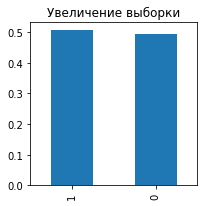

In [22]:
class_frequency = target_upsampled.value_counts(normalize = True)
print(class_frequency)
plt.figure(figsize = (3,3))
plt.title('Увеличение выборки')
class_frequency.plot(kind = 'bar')

1    0.505795
0    0.494205
Name: Exited, dtype: float64


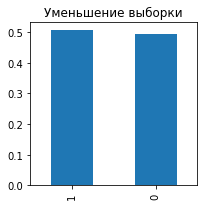

In [23]:
class_frequency = target_downsampled.value_counts(normalize = True)
print(class_frequency)
plt.figure(figsize = (3,3))
plt.title('Уменьшение выборки')
class_frequency.plot(kind = 'bar')

### Модель "Решающее Дерево"

In [24]:
model = DecisionTreeClassifier(random_state = 12345)
parameters = {'max_depth':range(1,16,1)}
grid = GridSearchCV(model,parameters,scoring = 'f1',cv = None)
grid.fit(features_upsampled,target_upsampled)
print(grid.best_params_)
predictions_valid = grid.predict(features_valid)
f1 = f1_score(target_valid, predictions_valid)
probabilities_valid = grid.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:,1]
auc_roc = roc_auc_score(target_valid,probabilities_one_valid)
print("F1-мера наилучшей модели на валидационной выборке:",f1)
print("AUC_ROC:",auc_roc)

{'max_depth': 15}
F1-мера наилучшей модели на валидационной выборке: 0.5116279069767441
AUC_ROC: 0.699654830525175


In [25]:
col = 'DecisionTreeUp'
total_table.loc[0,col]=f1
total_table.loc[1,col]=auc_roc
total_table.loc[2,col]=[grid.best_params_.items()]

In [26]:
model = DecisionTreeClassifier(random_state = 12345)
parameters = {'max_depth':range(1,16,1)}
grid = GridSearchCV(model,parameters,scoring = 'f1',cv = None)
grid.fit(features_downsampled,target_downsampled)
print(grid.best_params_)
predictions_valid = grid.predict(features_valid)
f1 = f1_score(target_valid, predictions_valid)
probabilities_valid = grid.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:,1]
auc_roc = roc_auc_score(target_valid,probabilities_one_valid)
DecisionTree_fpr,DecisionTree_tpr,thresholds = roc_curve(target_valid,probabilities_one_valid)
print("F1-мера наилучшей модели на валидационной выборке:",f1)
print("AUC_ROC:",auc_roc)

{'max_depth': 4}
F1-мера наилучшей модели на валидационной выборке: 0.560931899641577
AUC_ROC: 0.8212331572076066


In [27]:
col = 'DecisionTreeDown'
total_table.loc[0,col]=f1
total_table.loc[1,col]=auc_roc
total_table.loc[2,col]=[grid.best_params_.items()]

### Модель "Случайный Лес"

In [28]:
model = RandomForestClassifier(random_state = 12345,class_weight = 'balanced')
parametrs = {'n_estimators':range(1,100,20),'max_depth':range(1,12,2)}
grid = GridSearchCV(model,parametrs,scoring = 'f1',cv = 5)
grid.fit(features_upsampled,target_upsampled)
print(grid.best_params_)
predictions_valid = grid.predict(features_valid)
f1 = f1_score(target_valid,predictions_valid)
probabilities_valid = grid.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:,1]
auc_roc = roc_auc_score(target_valid,probabilities_one_valid)
RandomForest_fpr,RandomForest_tpr,thresholds = roc_curve(target_valid,probabilities_one_valid)
print("F1-мера наилучшей модели на валидационной выборке:",f1)
print("AUC_ROC:",auc_roc)

{'max_depth': 11, 'n_estimators': 81}
F1-мера наилучшей модели на валидационной выборке: 0.6286379511059371
AUC_ROC: 0.8678472016947484


In [29]:
col = 'RandomForestUp'
total_table.loc[0,col]=f1
total_table.loc[1,col]=auc_roc
total_table.loc[2,col]=[grid.best_params_.items()]

In [30]:
model = RandomForestClassifier(random_state = 12345,class_weight = 'balanced')
parametrs = {'n_estimators':range(1,100,20),'max_depth':range(1,12,2)}
grid = GridSearchCV(model,parametrs,scoring = 'f1',cv = 5)
grid.fit(features_downsampled,target_downsampled)
print(grid.best_params_)
predictions_valid = grid.predict(features_valid)
f1 = f1_score(target_valid,predictions_valid)
probabilities_valid = grid.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:,1]
auc_roc = roc_auc_score(target_valid,probabilities_one_valid)
RandomForest_fpr,RandomForest_tpr,thresholds = roc_curve(target_valid,probabilities_one_valid)
print("F1-мера наилучшей модели на валидационной выборке:",f1)
print("AUC_ROC:",auc_roc)

{'max_depth': 9, 'n_estimators': 81}
F1-мера наилучшей модели на валидационной выборке: 0.6236766121270452
AUC_ROC: 0.8686647083456498


In [31]:
col = 'RandomForestDown'
total_table.loc[0,col]=f1
total_table.loc[1,col]=auc_roc
total_table.loc[2,col]=[grid.best_params_.items()]
total_table

,Метрика,DecisionTree,RandomForest,ForestnoBalance,LogisticRegression,DecisionTreeUp,DecisionTreeDown,RandomForestUp,RandomForestDown
0,F-1 мера,0.575926,0.636782,0.60091,0.537615,0.511628,0.560932,0.628638,0.623677
1,AUC-ROC,0.823412,0.869607,0.867139,0.795489,0.699655,0.821233,0.867847,0.868665
2,param,"((max_depth, 6))","((max_depth, 9), (n_estimators, 61))","((max_depth, 11), (n_estimators, 41))","((C, 0.0018329807108324356))","((max_depth, 15))","((max_depth, 4))","((max_depth, 11), (n_estimators, 81))","((max_depth, 9), (n_estimators, 81))"


### ROC-кривые

Для сравнения с базовой моделью создадим dummy-модель средствами библиотеки sklearn, стратегию зададим most_frequent

In [32]:
dummy_model = DummyClassifier(strategy = "most_frequent",random_state = 12345)
dummy_model.fit(features_train,target_train)
probabilities_test = dummy_model.predict_proba(features_test)
probabilities_one_test = probabilities_test[:, 1]
dummy_fpr,dummy_tpr,dummy_thresholds = roc_curve(target_test, probabilities_one_test)


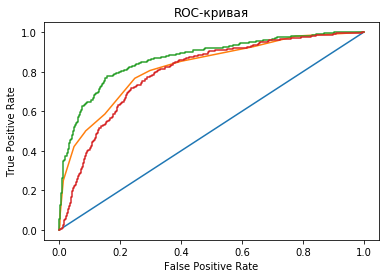

In [33]:
plt.plot(dummy_fpr,dummy_tpr)
plt.plot(DecisionTree_fpr,DecisionTree_tpr)
plt.plot(RandomForest_fpr,RandomForest_tpr)
plt.plot(LogisticRegression_fpr,LogisticRegression_tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.show()

Лучше всех кривая у RandomForest с параметрами max_depth = 11, n_estimators = 81

## Тестирование модели

Протестируем модель на найденных параметрах в качестве обучающей возьмём тестовую валидационную выборку

In [34]:
model = RandomForestClassifier(random_state = 12345, max_depth = 11, n_estimators = 61, class_weight = 'balanced')
model.fit(features_train.append(features_valid),target_train.append(target_valid))
predicted_test = model.predict(features_test)
probabilities_test = model.predict_proba(features_test)
probabilities_one_test = probabilities_test[:,1]
auc_roc = roc_auc_score(target_test, probabilities_one_test)
print("F1-мера:",f1_score(target_test,predicted_test))
print("AUC_ROC:",auc_roc)

F1-мера: 0.5901639344262296
AUC_ROC: 0.8531335649979719


Построим ROC-кривую тестирования

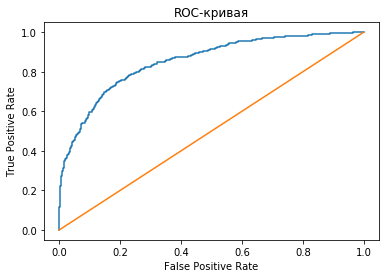

In [35]:
fpr,tpr,thresholds = roc_curve(target_test,probabilities_one_test)
plt.plot(fpr,tpr)
plt.plot(dummy_fpr,dummy_tpr)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.show()

AUC-ROC случайной модели равна 0.5, а наша 0.85, то есть модель адекватна и достаточно точна в предсказаниях.

## Вывод

Мы исследовали баланс классов, построили, обучили и протестировали три модели  - решающее дерево, случайный лес и логистическую регрессию, а так же измерили F-1 меру и AUC-ROC.

Категориальные признаки перевели в численные с помощью OHE-Hot Encoding, а численные привели к одному масштабу.
Целе вой признак в данных распределен в отношении 4:1, что мешает обучению модели.
Для борьбы с дизбалансом мы попробовали балансировку классов с помощью аргумента class_weight и функцию уменьшения и увеличения выборкию
Максимально большое значение F-1 меры показала функция увеличения выборки на модели "Случайный Лес".
Удалось добиться результата F-1 более 0.59, а значения AUC-ROC - 0.85, значения метрик и построенный график ROC-кривой говорят о том, что наша модель адекватная и предсказывает тоже хорошо.

##  Чек-лист готовности проекта

- [x]  Jupyter Notebook открыт
- [x]  Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке исполнения
- [x]  Выполнен шаг 1: данные подготовлены
- [x]  Выполнен шаг 2: задача исследована
    - [x]  Исследован баланс классов
    - [x]  Изучены модели без учёта дисбаланса
    - [x]  Написаны выводы по результатам исследования
- [x]  Выполнен шаг 3: учтён дисбаланс
    - [x]  Применено несколько способов борьбы с дисбалансом
    - [x]  Написаны выводы по результатам исследования
- [x]  Выполнен шаг 4: проведено тестирование
- [x]  Удалось достичь *F1*-меры не менее 0.59
- [x]  Исследована метрика *AUC-ROC*